In [1]:
import os
import csv
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
len_min = 3

In [3]:
disease = 'multiple_myeloma'
file_name = 'ehr-shuffle.csv'
date_time_folder = '2018-10-10-16-44-0' 

data_folder = os.path.expanduser('~/data1/complex_disorders/data/%s/cohorts/%s' % (disease, date_time_folder))

with open(os.path.join(data_folder, file_name)) as f:
    rd = csv.reader(f)
    ehr_shuffle = {}
    sub_len = []
    for r in rd:
        sub_len.append(len(r[1::]))
        ehr_shuffle.setdefault(r[0], list()).extend(r[1::])

In [4]:
print("The average number of tokens for each time slot of N days is {0:.2f}".format(np.mean(sub_len)))

The average number of tokens for each time slot of N days is 8.02


(array([1.32574e+05, 1.06690e+04, 4.25700e+03, 2.12800e+03, 1.16600e+03,
        4.66000e+02, 1.94000e+02, 5.80000e+01, 1.40000e+01, 9.00000e+00]),
 array([  1. ,  15.5,  30. ,  44.5,  59. ,  73.5,  88. , 102.5, 117. ,
        131.5, 146. ]),
 <a list of 10 Patch objects>)

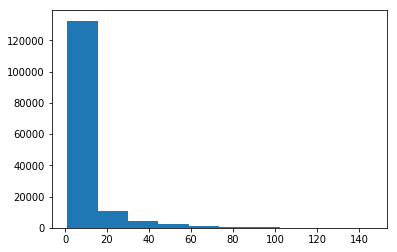

In [5]:
plt.hist(sub_len)

In [6]:
l = []
for mrn in ehr_shuffle:
    l.append(len(ehr_shuffle[mrn]))
print("The average length of ehr sequences is: {0:.2f}".format(np.mean(l)))

The average length of ehr sequences is: 90.43


In [7]:
count = 0
for ll in l:
    if ll<3:
        count += 1
print("{0} of {1} patients have less than 3 records".format(count, len(l)))

849 of 13432 patients have less than 3 records


In [8]:
print("The sequence length ranges from {0} to {1}".format(min(l), max(l)))

The sequence length ranges from 1 to 4383


(array([1.0888e+04, 1.2780e+03, 5.1500e+02, 2.8300e+02, 1.4500e+02,
        1.0900e+02, 6.0000e+01, 4.8000e+01, 2.7000e+01, 2.6000e+01,
        1.4000e+01, 1.0000e+01, 4.0000e+00, 6.0000e+00, 2.0000e+00,
        6.0000e+00, 3.0000e+00, 0.0000e+00, 2.0000e+00, 2.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00]),
 array([1.00000000e+00, 1.22722222e+02, 2.44444444e+02, 3.66166667e+02,
        4.87888889e+02, 6.09611111e+02, 7.31333333e+02, 8.53055556e+02,
        9.74777778e+02, 1.09650000e+03, 1.21822222e+03, 1.33994444e+03,
        1.46166667e+03, 1.58338889e+03, 1.70511111e+03, 1.82683333e+03,
        1.94855556e+03, 2.07027778e+03, 2.19200000e+03, 2.31372222e+03,
        2.43544444e+03, 2.55716667e+03, 2.67888889e+03, 2.80061111e+03,
        2.92233333e+03, 3.04405556e+03, 3.16577778e+03, 3.28750000e+03

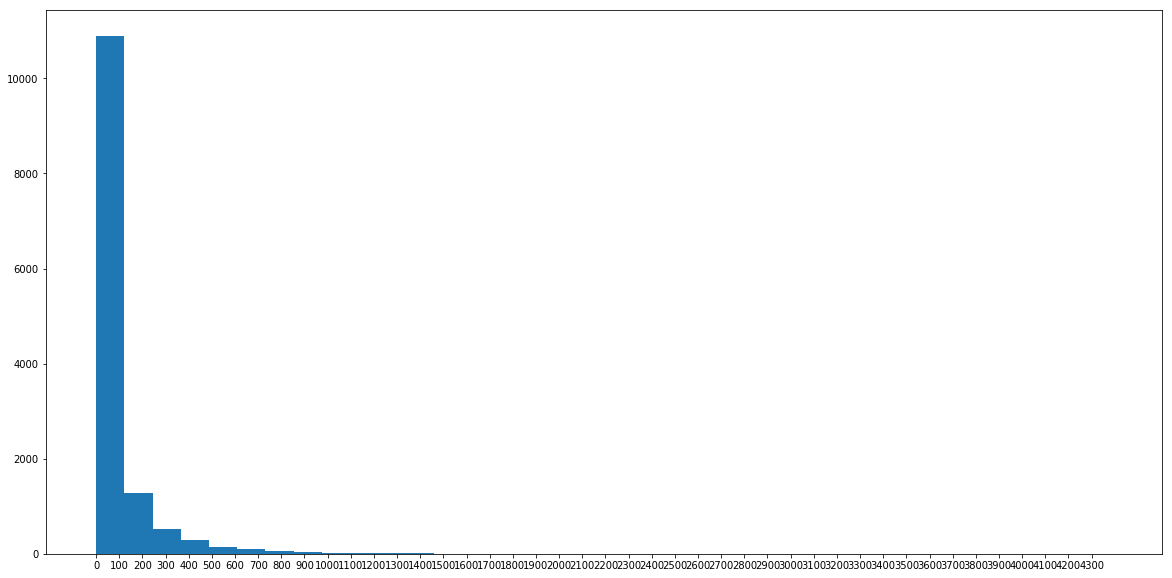

In [9]:
plt.figure(figsize=[20,10])
plt.xticks(np.arange(0, max(l), 100))
plt.hist(l, bins = 36)

In [10]:
with open(os.path.join(data_folder, 'list_mrnToDrop.csv'), 'w') as f:
    wr = csv.writer(f, delimiter=',')
    discard_list = []
    for mrn in ehr_shuffle:
        if len(ehr_shuffle[mrn]) < len_min:
            discard_list.append(mrn)
    wr.writerow(discard_list)

In [11]:
print("We are dropping {0} out of {1} patients".format(len(discard_list), len(ehr_shuffle)))

We are dropping 849 out of 13432 patients


In [8]:
with open('/home/isotta/data1/complex_disorders/data/autism/cohorts/2018-10-23-17-35-48/padded_ehrs.csv') as f:
    rd = csv.reader(f)
    ehrs = []
    for r in rd:
        ehrs += [list(map(int, r))]

In [16]:
with open(os.path.expanduser('~/data1/complex_disorders/data/autism/cohorts/2018-10-23-17-35-48/ordered_classes.csv')) as f:
    rd = csv.reader(f)
    classes = []
    for c in rd:
        classes += c

In [18]:
asd = []
for idx, c in enumerate(classes):
    if c == '1':
        asd.append([e for e in ehrs[idx] if e != 0])
        


In [20]:
len(asd)

938

In [33]:
asd_l = [len(a) for a in asd]
count = 0
for al in asd_l:
    if al >= 100:
        count+=1

In [34]:
count

437

(array([0.50426439, 0.17910448, 0.10127932, 0.06823028, 0.03411514,
        0.03091684, 0.02452026, 0.01492537, 0.01066098, 0.00533049,
        0.00639659, 0.00533049, 0.00533049, 0.0010661 , 0.00319829,
        0.        , 0.0010661 , 0.        , 0.        , 0.0021322 ,
        0.        , 0.0010661 , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.0010661 ]),
 array([3.00000000e+00, 8.85555556e+01, 1.74111111e+02, 2.59666667e+02,
        3.45222222e+02, 4.30777778e+02, 5.16333333e+02, 6.01888889e+02,
        6.87444444e+02, 7.73000000e+02, 8.58555556e+02, 9.44111111e+02,
        1.02966667e+03, 1.11522222e+03, 1.20077778e+03, 1.28633333e+03,
        1.37188889e+03, 1.45744444e+03, 1.54300000e+03, 1.62855556e+03,
        1.71411111e+03, 1.79966667e+03, 1.88522222e+03, 1.97077778e+03,
        2.05633333e+03, 2.14188889e+03, 2.22744444e+03, 2.31300000e+03

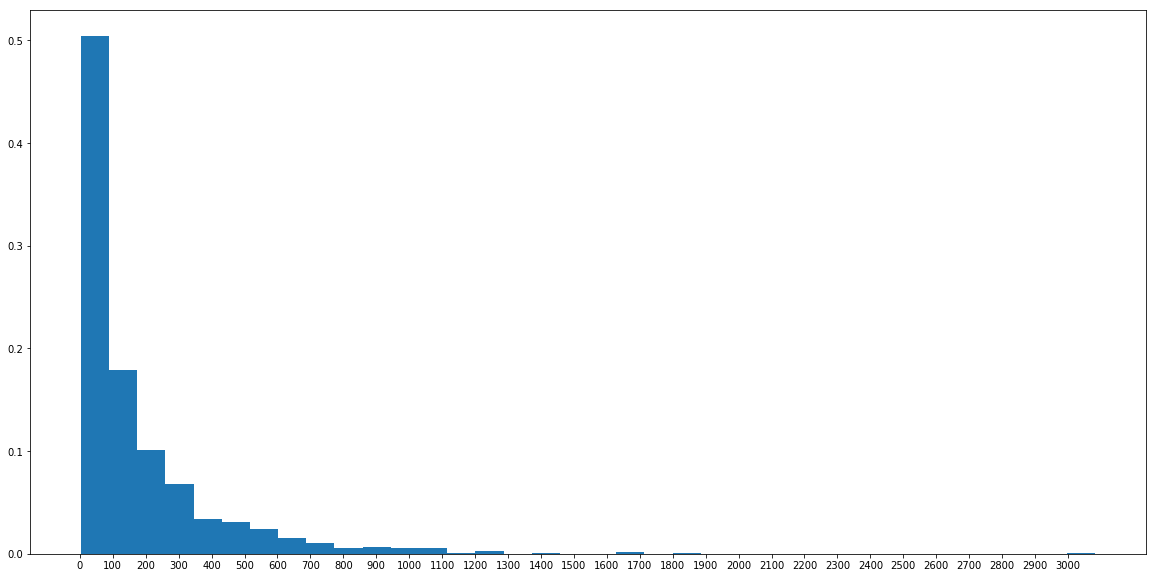

In [28]:
plt.figure(figsize=[20,10])
plt.xticks(np.arange(0, max(asd_l), 100))
plt.hist(asd_l, bins = 36, weights=np.zeros_like(asd_l) + 1. / len(asd))